## **Importing essential Libraries**

In [60]:
!pip install nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Data Analysis**

In [6]:
#load the data

data = pd.read_csv(r"/content/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")


Dataset shape : (3150, 5)


In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
#displaying column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [9]:
#checking for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

* no null values (0)

In [10]:
#just in case
data.dropna(inplace=True)

In [11]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3150, 5)


In [12]:
#creating a new column 'length' to know the length of the string in 'verfied_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [13]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Datatypes of the features

In [14]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

* rating,feedback and length are integer values
* date,variation and verified_reviews are string values

**Analysing the 'Rating' column**
* the column which provides the rating of the variation given by the user

In [15]:
 #distinct values od 'rating'(5 star,4 star,3,2,1) and its count

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


* 2286 5 star reviews for alexa

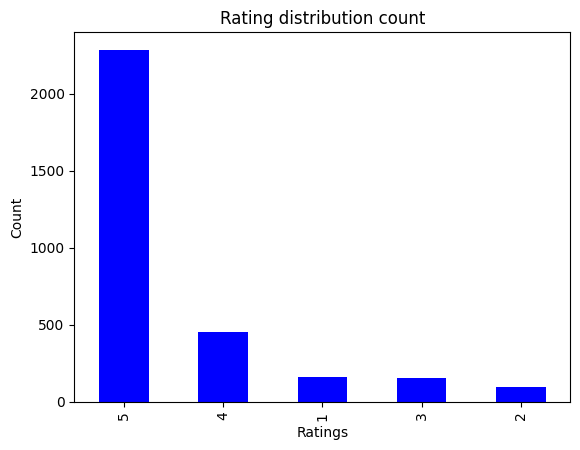

In [16]:
#plotting a simple bar graph with ratings on x-axis and count on y-axis

data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [17]:
#finding the percentage distribution of each rating; by diving the number of records for each rating by the total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


* plotting the above values in a pie chart;

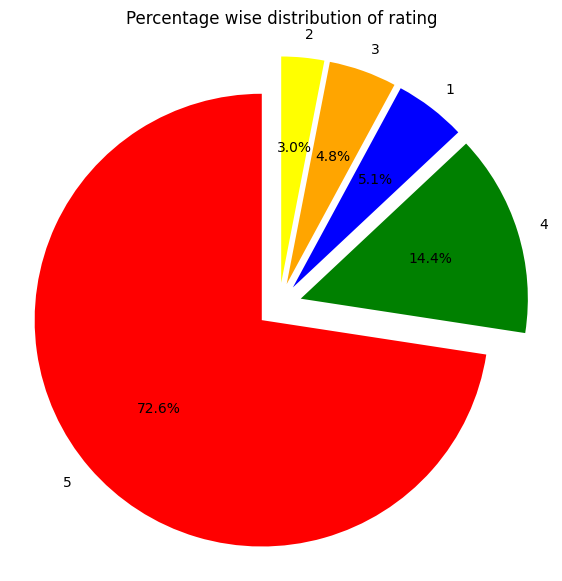

In [18]:
# Calculate percentage distribution of each rating
percentage_distribution = data['rating'].value_counts(normalize=True) * 100

# Define colors for each slice of the chart
colors = ['red', 'green', 'blue', 'orange', 'yellow']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct="%1.1f%%", colors=colors, startangle=90, explode=(0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Percentage wise distribution of rating')
plt.axis('equal')  # Equal aspect for the pie to be drawn as a circle
plt.show()

**Analysing 'feedback' column**

* the column which gives the feedback of the verified review

In [19]:
#distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['rating'].value_counts()}")

Feedback value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


There are 2 different values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to(although originally we might think 1 meansperson had given feedback  and 0 means no feedback)

# for records with feedback = 0

In [20]:
# Checking if there are any records with feedback = 0
if (data['feedback'] == 0).any():
    # Extract the 'verified_reviews' value for the first record with feedback = 0
    review_0 = data[data['feedback'] == 0].iloc[0]['verified_reviews']
    print(review_0)
else:
    print("No records with feedback = 0")


"It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals."


--- the review for the first record

similarly for the fourth record it would be:

In [21]:
#Extracting the 'verified_reviews' value for fourth record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[3]['verified_reviews']
print(review_0)

"Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?"


-- simplified code without checking as we know the number of feedbacks with 0

# * for records with feedback = 1

In [22]:
# Checking if there are any records with feedback = 1
if (data['feedback'] == 1).any():
    # Extract the 'verified_reviews' value for the one record with feedback = 1
    review_0 = data[data['feedback'] == 1].iloc[0]['verified_reviews']
    print(review_0)
else:
    print("No records with feedback = 1")

Love my Echo!


similarly for the fourth record with feedback = 1:

In [23]:
#Extracting the 'verified_reviews' value for fourth record with feedback = 1

review_0 = data[data['feedback'] == 1].iloc[3]['verified_reviews']
print(review_0)

"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."


From the above 4 examples we can understand that 0 is negative review and 1 is positive review; plotting a bar graph, finding the percentage distribution and plotting a pie chart:

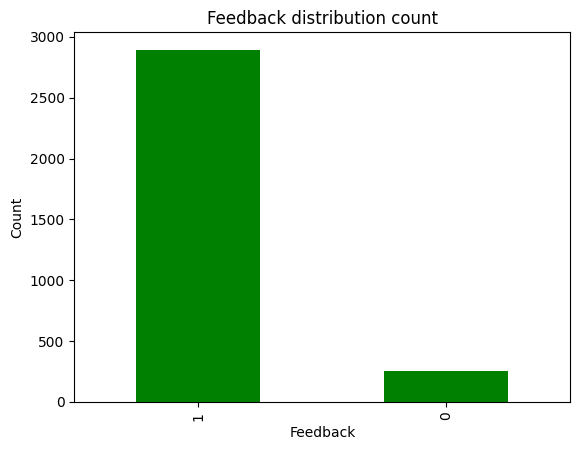

In [24]:
#Bar graph to display the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'green')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [25]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
1    91.84
0     8.16
Name: feedback, dtype: float64


Feedback distribution

* 91.87% reviews are positive
* 8.13% reviews are negative

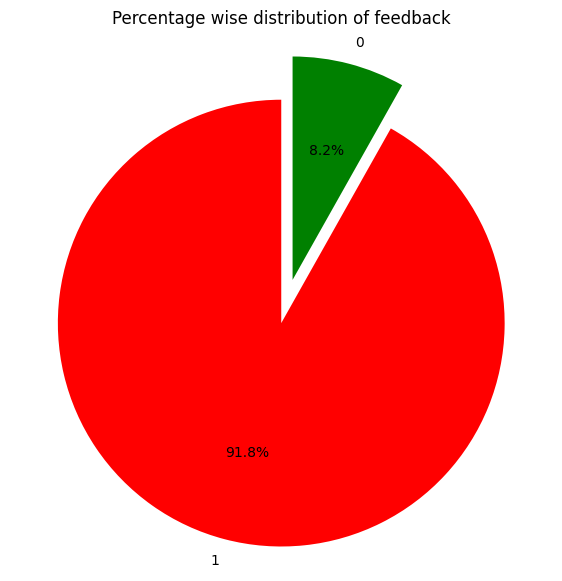

In [26]:
# Calculate percentage distribution of each feedback
percentage_distribution = data['feedback'].value_counts(normalize=True) * 100

# Define colors for each slice of the chart
colors = ['red', 'green']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct="%1.1f%%", colors=colors, startangle=90, explode=(0.1, 0.1))
plt.title('Percentage wise distribution of feedback')
plt.axis('equal')  # Equal aspect for the pie to be drawn as a circle
plt.show()


Now let's see the 'rating' values for different values of 'feedback'

In [27]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()
print(data[data['feedback'] == 0]['rating'].value_counts())

1    161
2     96
Name: rating, dtype: int64


In [28]:
#for feedback = 1;
data[data['feedback']== 1]['rating'].value_counts
print(data[data['feedback'] == 1]['rating'].value_counts())

5    2286
4     455
3     152
Name: rating, dtype: int64


----If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

# Analyzing 'variation' column
* this column refers to the type of amazon alexa(eg: Black Dot, Charcoal Fabric, white, white spot etc)

In [29]:
# displaying values of 'variation' and its count

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


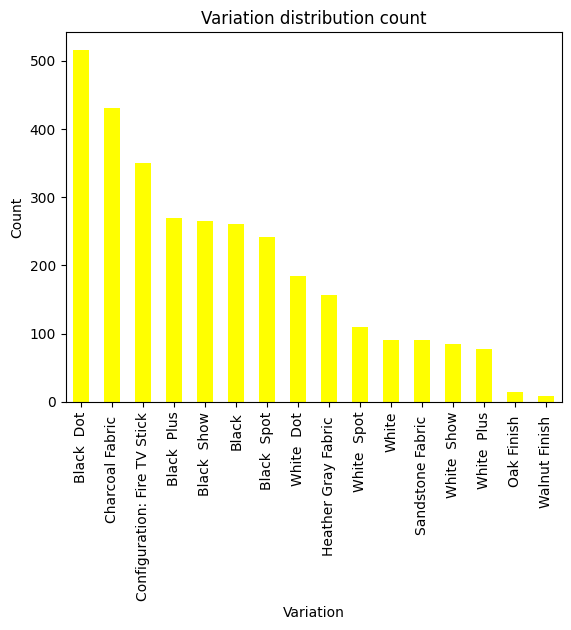

In [30]:
#bar graph;

data['variation'].value_counts().plot.bar(color = 'yellow')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [31]:
#finding the percentage distribution of each variation; by diving the number of records for each variation by the total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


In [32]:
#variation vs mean rating;

data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

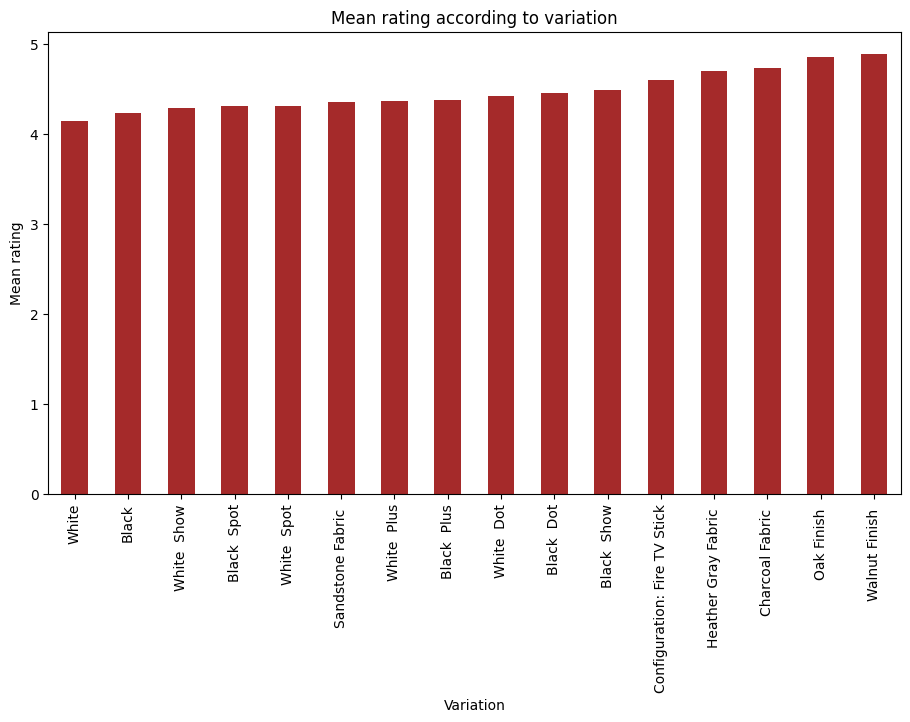

In [33]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

---- the output shows the average rating for each of the variations

#Analyzing 'length' column

*gives the length of  the string in 'verfied_reviews' column

In [34]:
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

**Different statistics of the 'length' column:**

* Count: The number of non-null values in the length column.
* Mean: The average value of the length column.
* Std: The standard deviation of the length column.
* Min: The minimum value in the length column.
* 25%: The first quartile (25th percentile) of the length column.
* 50%: The median (50th percentile) of the length column.
* 75%: The third quartile (75th percentile) of the length column.
* Max: The maximum value in the length column.


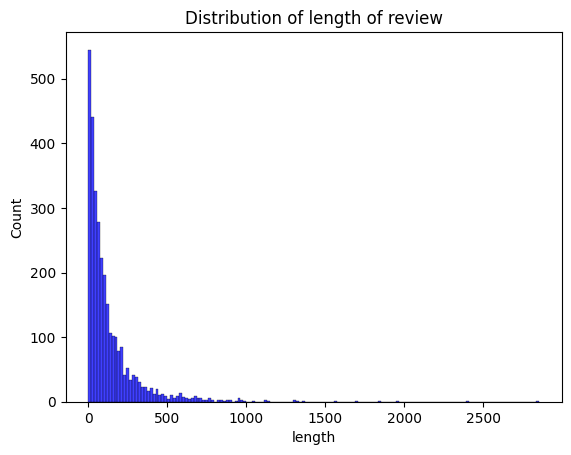

In [35]:

# Create a histogram of the 'length' column using the seaborn library(for the full dataset)
import seaborn as sns
sns.histplot(data['length'], color='blue')
plt.title('Distribution of length of review')
plt.show()

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

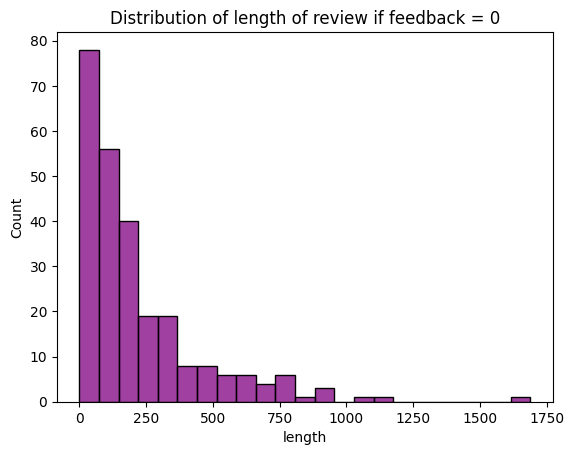

In [36]:
#histogram showing the length distribution when feedback is equal to 0:

sns.histplot(data[data['feedback']==0]['length'],color='purple').set(title='Distribution of length of review if feedback = 0')


------The set() method in seaborn is used to set attributes such as titles

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

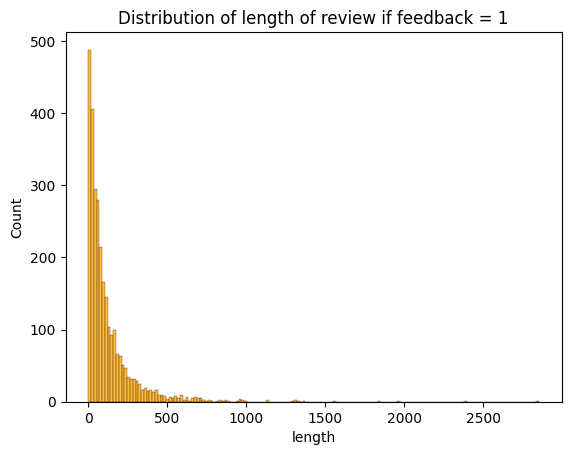

In [37]:
#histogram showing the length distribution when feedback is equal to 1:

sns.histplot(data[data['feedback']==1]['length'],color='orange').set(title='Distribution of length of review if feedback = 1')


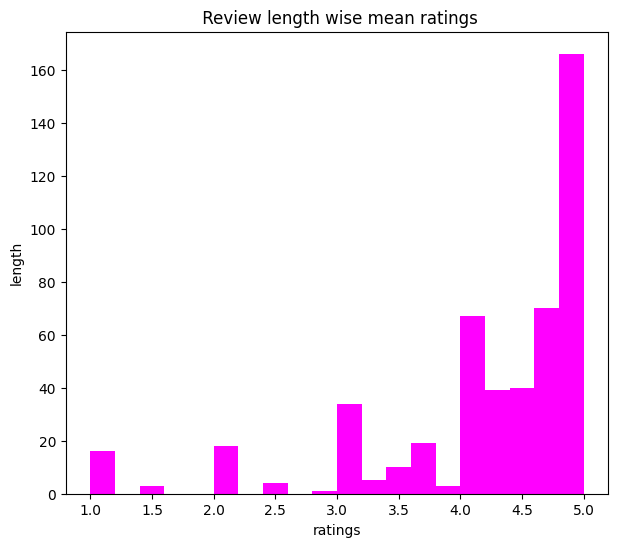

In [38]:
#lengthwise mean rating

data.groupby('length')['rating'].mean().plot.hist(color = 'magenta', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

------the mean length of the positive reviews is higher as expected as it shows that when people tend to be happy about a product they slurge on about it wheres when they dislike a product they dont bother to review so much about it

applying CountVectorizer and its parameters(tokenization,building vocabulary, counting occurences etc) used with scikit-learn

In [39]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

# 'stop_words' parameter removes common English stop words (eg:'the', 'and', 'is') from the text data duringtokenization
# 'fit_transfrom' method fits the vectorizer to the text data (learns the vocabulary) and transforms the text data into a matrix of token counts.
# Each row of the resulting matrix represents a review, and each column represents a unique word in the vocabulary.
# The value in each cell indicates the frequency of the corresponding word in the respective review.

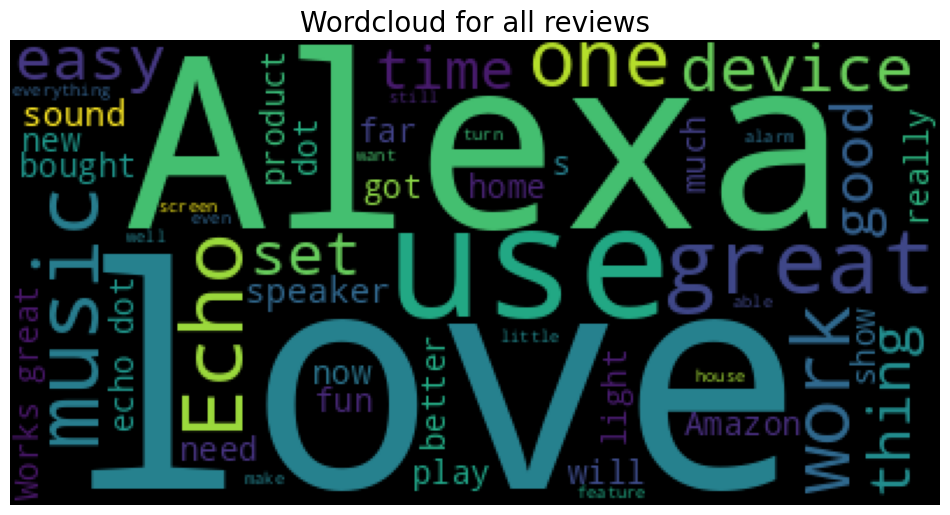

In [40]:
#word cloud instead of a matrix which shows the more frequently repeated words in larger size
#1. combine all reviews:
reviews = " ".join([review for review in data['verified_reviews']])

#2. setting the parameters of the wordcloud; background color, maximum words
wc = WordCloud(background_color='black', max_words=50)

#3. generating and plotting the WC
plt.figure(figsize=(12,12))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=20)
plt.axis('off') #turns off axis labels
plt.show()



----- alexa, love,echo etc. are some frequently used words

In [41]:
#plotting the unique words in each feedback category;

#For negative feedback (where 'feedback' is equal to 0), the code combines all the reviews into a single string (neg_reviews), converts the string to lowercase, and splits into individual words.
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

#for positive reviews;
pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#For negative feedback, the code creates a list (unique_negative) containing words that are present in negative reviews but not in positive reviews and vice versa.
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)



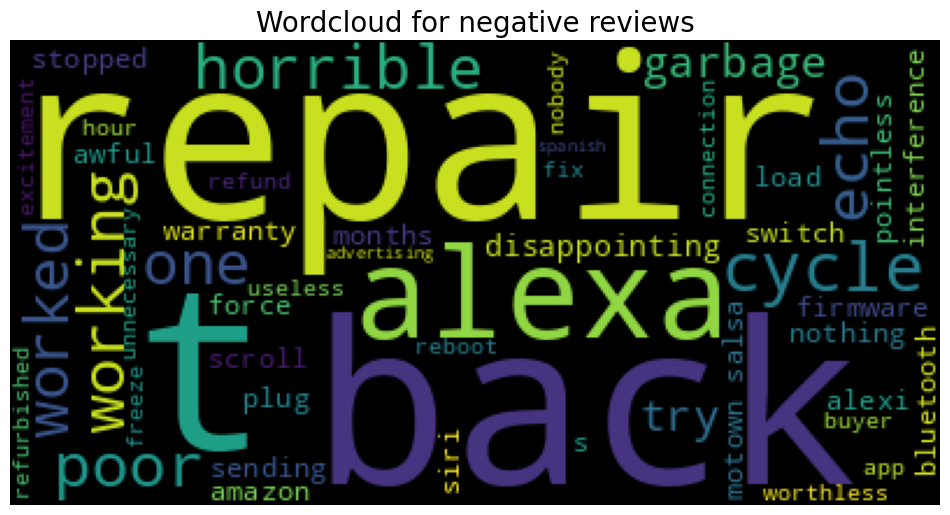

In [42]:
#setting,generating the wordcloud for negative reviews:
wc = WordCloud(background_color='black', max_words=50)
plt.figure(figsize=(12,12))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=20)
plt.axis('off')
plt.show()

---- repair, garbage, stopped etc. represents negative feedbacks

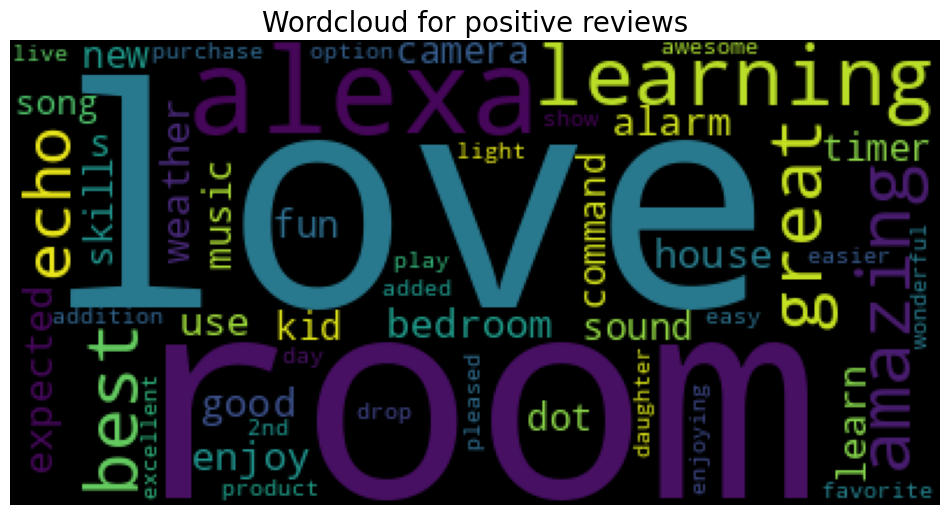

In [43]:
#setting, generating wordcloud for positive reviews;
wc = WordCloud(background_color='black', max_words=50)
plt.figure(figsize=(12,12))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=20)
plt.axis('off')
plt.show()

---love, good, great etc. represent positive reviews

# **Preprocessing and Modelling**

to build the text dataset or corpus from the 'verified_reviews:

1. replace non alphabet characters with a space
2. convert to lower case and split into words
3. gathering the words and adding the stemmed(base form) of the important words to the corpus

In [44]:
corpus = []  # Initialize an empty list to store preprocessed reviews
stemmer = PorterStemmer()  # lib used to remove suffixes to get stem words

# Loop through each row in the Dataframe
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])  # Remove non-alphabetical characters
    review = review.lower().split()  # Convert review to lowercase and split it into words
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]  # Stem each word and remove stopwords
    review = ' '.join(review)  # Join the remaining words back into a single string
    corpus.append(review)  # Append(add the item at the end) the processed review to the corpus list


------ the corpus list will contain the processed reviews, where each review consists of stemmed words without stopwords.

In [45]:
#initializing CountVectorizer with maximum features set to 2500
cv = CountVectorizer(max_features=2500)

# Transform the text data into a bag-of-words representation and convert to an array
X = cv.fit_transform(corpus).toarray()

# Extract the dependent variable 'feedback' from the DataFrame 'data'
y = data['feedback'].values

Therefore, 'X' will conatin the bag of words representation of the data with each row representing a review and each column representing a word feature and 'y' will showcase the feedbacks associated with each review. X will be an independent variable and y will depend on X

In [47]:
import os
if not os.path.exists('Models'):
    os.makedirs('Models')
    pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [48]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [49]:
#checking shape of X and y

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (3150, 2500)
y shape: (3150,)


Splitting X and y into train and test subsets, using 30% data for testing, setting random split state(for reproducibility) to 15

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

#displaying shapes of the train and test dataset
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945,)


In [51]:
#printing the maximum value among all the feature values across all rows and columns within 'X_train' and 'X_test'
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")
print(f"y train max value: {y_train.max()}")
print(f"y test max value: {y_test.max()}")


X train max value: 12
X test max value: 10
y train max value: 1
y test max value: 1


**Scaling**
* scaling using MinMaxScaler ensures that the features in both the training and test sets have the same scale, making the data suitable for use with machine learning algorithm

In [57]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [58]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

**XGBoost**

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm known for its speed and accuracy. It builds multiple decision trees sequentially, each correcting the errors of its predecessor. XGBoost is widely used in various data science competitions and real-world applications due to its efficiency and effectiveness.

In [72]:
model_xgbdel_xgb = XGBClassifier() #applying default hyperparameters to the XGBoost classifier
model_xgb = model_xgbdel_xgb
model_xgb.fit(X_train_scl, y_train)#to train the classifier using the training data so that it can make predictions on new data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

---- default parameters

In [73]:
#saving the trained model
pickle.dump(model_xgb, open('Models/sentiment_model.pkl', 'wb'))

In [74]:
#saving the CountVectorizer and MinMaxScaler
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))


In [75]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))


Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9407407407407408


---- the high training and testing accuracies suggest that the XGBoost model is effective in classifying sentiment in the Amazon Alexa reviews dataset

In [76]:
#feeding the test data to the model to make predictions on it
y_preds = model_xgb.predict(X_test)

**Confusion matrix**
* the confusion matrix provides valuable insights into the performance of the classification model

In [77]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 25  50]
 [ 10 860]]


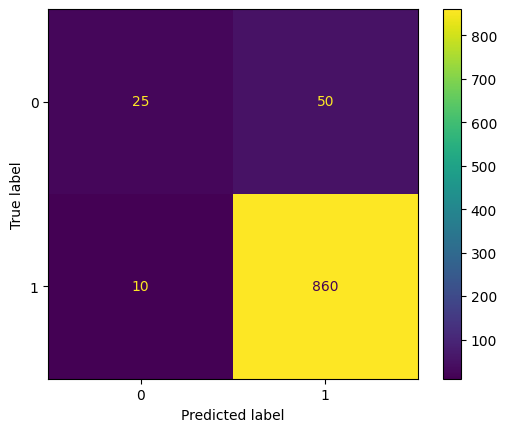

In [78]:
# displaying the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

* [[TN  FP]

  [FN  TP]]

* TN (True Negative): The number of samples that were correctly classified as negative (true negatives) - 25

* FP (False Positive): The number of samples that were incorrectly classified as positive (false positives) - 50

* FN (False Negative): The number of samples that were incorrectly classified as negative (false negatives) - 10

* TP (True Positive): The number of samples that were correctly classified as positive (true positives) 860

In [79]:
#Applying grid search to get the optimal parameters on XGBoost
# Create a dictionary of hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(model_xgb, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_scl, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)


{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.7}


In [84]:
# Initialize XGBoost Classifier with best hyperparameters
best_params = {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.7}
model_xgb = XGBClassifier(**best_params)

# Train the model
model_xgb.fit(X_train_scl, y_train)

# Evaluate the model
train_accuracy = model_xgb.score(X_train_scl, y_train)
test_accuracy = model_xgb.score(X_test_scl, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Make predictions
y_pred = model_xgb.predict(X_test_scl)




Training Accuracy: 0.963265306122449
Testing Accuracy: 0.9375661375661376


In [107]:
# Load the trained XGBoost model and preprocessing transformers
model_xgb = pickle.load(open('Models/sentiment_model.pkl', 'rb'))
cv = pickle.load(open('Models/countVectorizer.pkl', 'rb'))
scaler = pickle.load(open('Models/scaler.pkl', 'rb'))

def preprocess_text(text):
    return text.lower()

# Preprocess input data
def preprocess_input(input_text):
    # Preprocess text
    preprocessed_text = preprocess_text(input_text)

    # Transform text into bag-of-words representation
    input_vec = cv.transform([preprocessed_text])

    # Scale input features
    input_vec_scaled = scaler.transform(input_vec.toarray())

    return input_vec_scaled

# Make predictions on input data
def predict_sentiment(input_text):
    input_vec_scaled = preprocess_input(input_text)
    predicted_sentiment = model_xgb.predict(input_vec_scaled)[0]
    return "positive" if predicted_sentiment == 1 else "negative"


# Get input text from the user
input_text = input("Enter the review text: ")

# Make prediction and display result
predicted_sentiment = predict_sentiment(input_text)
print(f"The review is {predicted_sentiment}.")


Enter the review text: echo stopped working
The review is positive.


word combinations which gave negative - poor back repair,

might be due to data imbalance which can be resolves by techniques such as Using Scale_Pos_Weight Parameter,Adjusting Decision Threshold,Data Resampling